In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

np.random.seed(0)
plt.rc('font', size=8)
plt.rc('figure', titlesize=10)
plt.rc('axes', titlesize=10, labelsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=8)

### 1.a

In [2]:
dice_outcomes = [1, 2, 3, 4, 5, 6]
Omega = [(a, b, c) for a in dice_outcomes for b in dice_outcomes for c in dice_outcomes]
counter = 0
for outcome in Omega:
    if sum(outcome) == 10:
        counter +=1
print(f'{counter} out of {len(Omega)} outcomes sum to 10, or {counter/len(Omega):%}')

27 out of 216 outcomes sum to 10, or 12.500000%


### 2.a

In [3]:
def p_share(N):
    p_none_share = 1
    for i in range(N):
        p_none_share *= (365-i)/365
    return 1 - p_none_share

In [4]:
for i in range(2, 100):
    P = p_share(i)
    if P >= 0.75:
        print(f'N={i-1} has probability {p_share(i-1):%}')
        print(f'N={i} has probability {P:%}')
        break

N=31 has probability 73.045463%
N=32 has probability 75.334753%


### 3.b

In [5]:
def sample_hypercube(n):
    x = np.random.random_sample(size=n) * 2 - 1  # rescale to [-1, 1]
    r = np.linalg.norm(x)
    if r < 1:
        return True
    elif r > 1:
        return False

### 3.c

In [6]:
N_samples = 10000
N_in = 0
for i in range(N_samples):
    if sample_hypercube(3):
        N_in += 1
print(f'Number of points within sphere for 3D cubic domain: {N_in}')

Number of points within sphere for 3D cubic domain: 5118


### 3.d

In [7]:
N_samples = 10000
n_vec = range(1, 10+1)
in_vec = np.zeros(len(n_vec))
variance = np.zeros(len(n_vec))
for i, n in enumerate(n_vec):
    N_in = 0
    samples = np.zeros(N_samples, dtype=bool)
    for j in range(N_samples):
        samples[j] = sample_hypercube(n)
        if samples[j]:
            N_in += 1
    in_vec[i] = N_in / N_samples
    variance[i] = np.sum([(int(s)-in_vec[i])**2 for s in samples]) / N_samples**2

# compute confidence intervals from variance using normal approximation
lower, upper = stats.norm.interval(0.95, loc=in_vec, scale=np.sqrt(variance))

/home/exurl/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/exurl/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


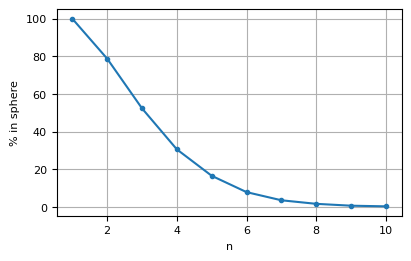

In [9]:
fig, ax = plt.subplots(layout="constrained", figsize=(4, 2.5))
ax.plot(n_vec, in_vec*100, '.-')
plt.xlabel('n')
plt.ylabel(r'% in sphere')
plt.grid(True)
plt.savefig('3dfig1.png', dpi=300)
plt.show()

### 3.e

### 4.a

In [10]:
def normal_sequences(N, n):
    dist = stats.norm(loc=10, scale=2)
    sequences = np.zeros((N, n))
    for i in range(N):
        sequences[i, :] = dist.rvs(size=n)
    return sequences

In [11]:
sequences = normal_sequences(1, 1000)

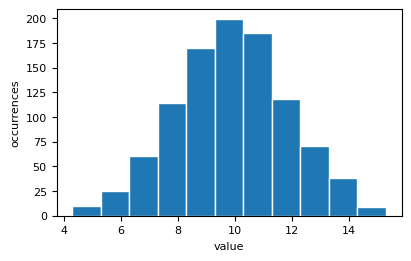

In [12]:
# Plot a histogram of a single sequence
min = np.min(sequences[0, :])
max = np.max(sequences[0, :])
fig, ax = plt.subplots(layout="constrained", figsize=(4, 2.5))
ax.hist(sequences[0, :], bins=np.arange(min, max, 1), edgecolor='w')
plt.xlabel('value')
plt.ylabel('occurrences')
plt.savefig('4afig1.png', dpi=300)
plt.show()

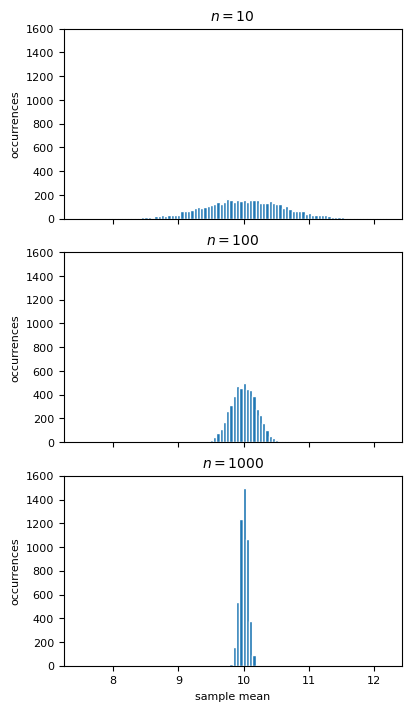

In [13]:
n_vec = [10, 100, 1000]
sample_means = []
for i, n in enumerate(n_vec):
    # Generate sequences
    sequences = normal_sequences(5000, n)

    # Compute sample mean for sequences
    sample_means.append(np.mean(sequences, axis=1))

# Plot sample means for sequences
min = np.min([np.min(sm) for sm in sample_means])
max = np.max([np.max(sm) for sm in sample_means])
fig, axs = plt.subplots(3, 1, layout="constrained", figsize=(4, 7), sharex=True)
for i, (sm, n) in enumerate(zip(sample_means, n_vec)):
    ax = axs[i]
    ax.hist(sm, bins=np.arange(min, max, 0.05), edgecolor='w')
    ax.set_title(f'$n={n}$')
    ax.set_ylabel('occurrences')
    ax.set_ylim(0, 1600)
plt.xlabel('sample mean')
plt.savefig(f'4afig2.png', dpi=300)
plt.show()

### 4.b

In [14]:
def poisson_sequences(N, n):
    dist = stats.poisson(mu=4)
    sequences = np.zeros((N, n))
    for i in range(N):
        sequences[i, :] = dist.rvs(size=n)
    return sequences

In [15]:
sequences = poisson_sequences(1, 1000)

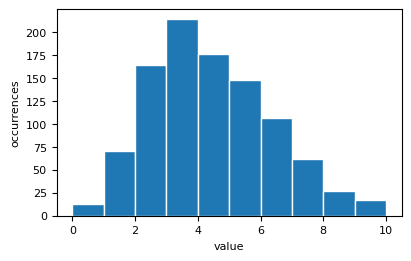

In [16]:
# Plot a histogram of a single sequence
min = np.min(sequences[0, :])
max = np.max(sequences[0, :])
fig, ax = plt.subplots(layout="constrained", figsize=(4, 2.5))
ax.hist(sequences[0, :], bins=np.arange(min, max, 1), edgecolor='w')
plt.xlabel('value')
plt.ylabel('occurrences')
plt.savefig('4bfig1.png', dpi=300)
plt.show()

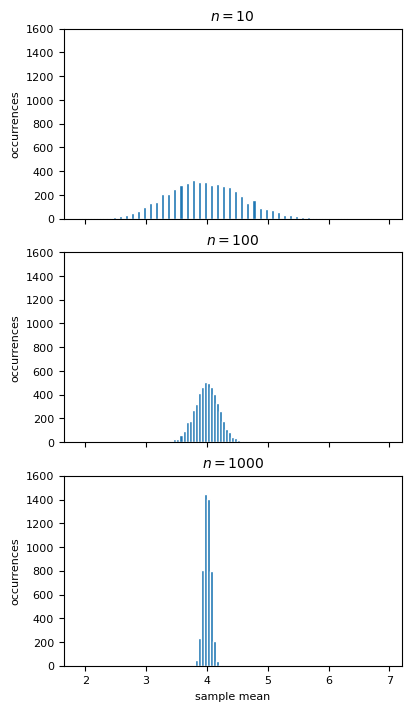

In [17]:
n_vec = [10, 100, 1000]
sample_means = []
for i, n in enumerate(n_vec):
    # Generate sequences
    sequences = poisson_sequences(5000, n)

    # Compute sample mean for sequences
    sample_means.append(np.mean(sequences, axis=1))

# Plot sample means for sequences
min = np.min([np.min(sm) for sm in sample_means])
max = np.max([np.max(sm) for sm in sample_means])
fig, axs = plt.subplots(3, 1, layout="constrained", figsize=(4, 7), sharex=True)
for i, (sm, n) in enumerate(zip(sample_means, n_vec)):
    ax = axs[i]
    ax.hist(sm, bins=np.arange(min, max, 0.05), edgecolor='w')
    ax.set_title(f'$n={n}$')
    ax.set_ylabel('occurrences')
    ax.set_ylim(0, 1600)
plt.xlabel('sample mean')
plt.savefig(f'4bfig2.png', dpi=300)
plt.show()

### 4.c

In [18]:
alpha = 1
beta = 0.5
def gamma_sequences(N, n):
    dist = stats.gamma(a=alpha, scale=1/beta)
    sequences = np.zeros((N, n))
    for i in range(N):
        sequences[i, :] = dist.rvs(size=n)
    return sequences

In [19]:
sequences = gamma_sequences(1, 1000)

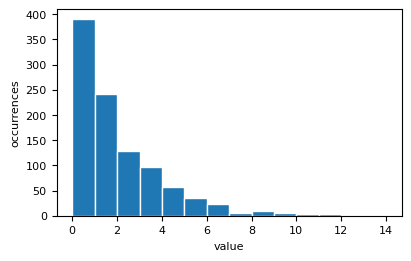

In [20]:
# Plot a histogram of a single sequence
min = np.min(sequences[0, :])
max = np.max(sequences[0, :])
fig, ax = plt.subplots(layout="constrained", figsize=(4, 2.5))
ax.hist(sequences[0, :], bins=np.arange(min, max, 1), edgecolor='w')
plt.xlabel('value')
plt.ylabel('occurrences')
plt.savefig('4cfig1.png', dpi=300)
plt.show()

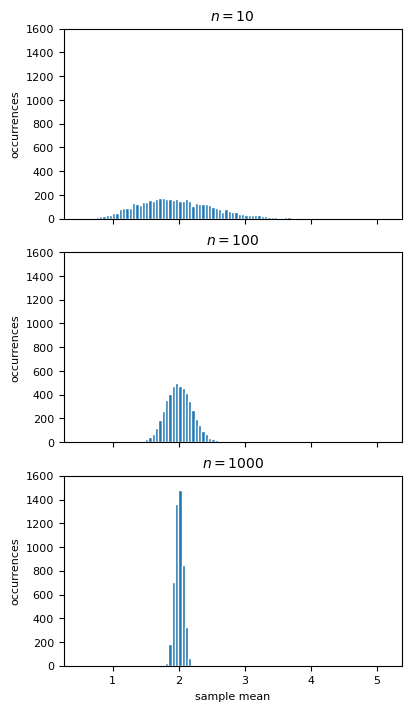

In [21]:
n_vec = [10, 100, 1000]
sample_means = []
for i, n in enumerate(n_vec):
    # Generate sequences
    sequences = gamma_sequences(5000, n)

    # Compute sample mean for sequences
    sample_means.append(np.mean(sequences, axis=1))

# Plot sample means for sequences
min = np.min([np.min(sm) for sm in sample_means])
max = np.max([np.max(sm) for sm in sample_means])
fig, axs = plt.subplots(3, 1, layout="constrained", figsize=(4, 7), sharex=True)
for i, (sm, n) in enumerate(zip(sample_means, n_vec)):
    ax = axs[i]
    ax.hist(sm, bins=np.arange(min, max, 0.05), edgecolor='w')
    ax.set_title(f'$n={n}$')
    ax.set_ylabel('occurrences')
    ax.set_ylim(0, 1600)
plt.xlabel('sample mean')
plt.savefig(f'4cfig2.png', dpi=300)
plt.show()

### 6.a

In [22]:
df = pd.read_excel(r'expanded_poisson_samples.xlsx')
df = df.squeeze()  # turn pd.DataFrame into pd.Series
print(df.head())
print(df.describe())

0     7
1     2
2    10
3    10
4     7
Name: Samples, dtype: int64
count    1207.000000
mean        9.362883
std         2.936737
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        18.000000
Name: Samples, dtype: float64


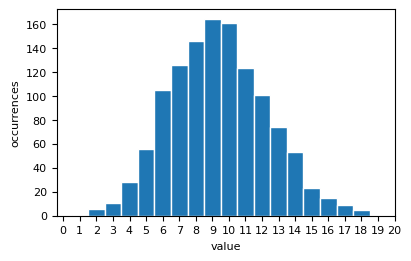

In [23]:
fig, ax = plt.subplots(figsize=(4,2.5), layout="constrained")
ax.hist(df, bins=np.arange(0.5, 19, 1), edgecolor='w')
ax.set_xticks(np.arange(0, 21))
ax.set_xlabel('value')
ax.set_ylabel('occurrences')
fig.savefig(r'6afig1.png', dpi=300)
plt.show()

### 6.b

In [24]:
print(f'Mean: {float(df.mean())}')
print(f'Variance: {df.var()}')

Mean: 9.36288318144159
Variance: 8.624425511217666


### 6.c

In [25]:
tenth = int(len(df)/10)
N = 10000
sample_means = np.zeros(N)
sample_vars = np.zeros(N)
for i in range(N):
    df_sample = df.sample(tenth)
    sample_means[i] = df_sample.mean()
    sample_vars[i] = df_sample.var()

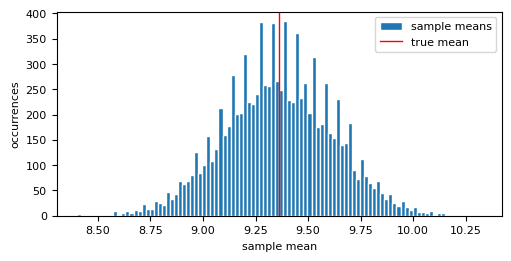

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.5), layout="constrained")
ax.hist(sample_means, bins=100, label='sample means', edgecolor='w')
ax.axvline(df.mean(), c='r', label='true mean', linewidth=1)
ax.set_xlabel('sample mean')
ax.set_ylabel('occurrences')
ax.legend()
fig.savefig(r'6cfig1.png', dpi=300)
plt.show()

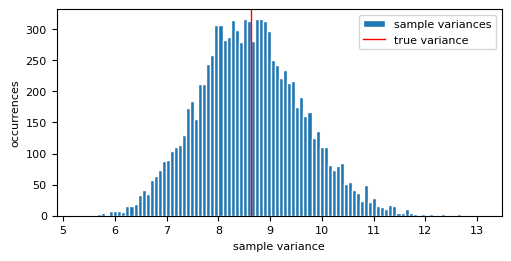

In [27]:
fig, ax = plt.subplots(figsize=(5, 2.5), layout="constrained")
ax.hist(sample_vars, bins=100, label='sample variances', edgecolor='w')
ax.axvline(df.var(), c='r', label='true variance', linewidth=1)
ax.set_xlabel('sample variance')
ax.set_ylabel('occurrences')
ax.legend()
fig.savefig(r'6cfig2.png', dpi=300)
plt.show()

### 6.d

In [28]:
# bin data
bins = np.arange(0, 19)
bin_counts = df.value_counts().reindex(bins, fill_value=0)
bin_probs = bin_counts / len(df)
print(bin_probs)

Samples
0     0.000000
1     0.000829
2     0.004971
3     0.009114
4     0.023198
5     0.046396
6     0.086993
7     0.104391
8     0.120961
9     0.135874
10    0.133389
11    0.101906
12    0.083679
13    0.061309
14    0.043911
15    0.019056
16    0.012428
17    0.007457
18    0.004143
Name: count, dtype: float64


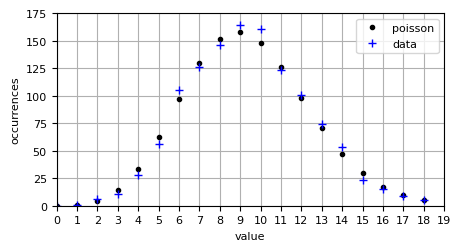

In [29]:
# plot binned data (histogram) against poisson
mu = df.mean()
poisson = stats.poisson.pmf(bins, mu) * len(df)
poisson_normalized = stats.poisson.pmf(bins, mu)

# fig, ax = plt.subplots(figsize=(5, 2.5))
# ax.set_xlim([0, 19])
# ax.set_ylim([0, 0.14])
# ax.plot(bins, poisson_normalized, 'k.', label='poisson')
# ax.plot(bins, bin_probs, 'b+', label='data')
# ax.set_xticks(np.arange(0, 20))
# ax.set_xlabel('value')
# ax.set_ylabel('probability')
# ax.legend()
# ax.grid(True)

fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_xlim([0, 19])
ax.set_ylim([0, 175])
ax.plot(bins, poisson, 'k.', label='poisson')
ax.plot(bins, bin_counts, 'b+', label='data')
ax.set_xticks(np.arange(0, 20))
ax.set_xlabel('value')
ax.set_ylabel('occurrences')
ax.legend()
ax.grid(True)
plt.savefig('6efig1.png', dpi=300)
plt.show()

In [30]:
# extend last bin to infinity
poisson[-1] = len(df) - stats.poisson.cdf(18, mu) * len(df)

# compute chi2
chi2 = np.sum((bin_counts-poisson)**2/poisson)
print(f'chi2 = {chi2}')

# compute p-value
dof = len(bins) - 1 - 1
p = stats.chi2.sf(chi2, dof)
print(f'p = {p}')

chi2 = 7.919027216538903
p = 0.9682474982260868


In [31]:
# chi2 for 100 samples of 10%
p_vec = []
for i in range(100):
    df_sample = df.sample(tenth)

    # bin data
    bins = np.arange(0, 19)
    bin_counts = df_sample.value_counts().reindex(bins, fill_value=0)
    bin_probs = bin_counts / len(df_sample)
    mu = df_sample.mean()
    poisson = stats.poisson.pmf(bins, mu) * len(df_sample)
    poisson_normalized = stats.poisson.pmf(bins, mu)

    # extend last bin to infinity
    poisson[-1] = len(df_sample) - stats.poisson.cdf(18, mu) * len(df_sample)

    # compute chi2
    chi2 = np.sum((bin_counts-poisson)**2/poisson)

    # compute p-value
    dof = len(bins) - 1 - 1
    p_vec.append(stats.chi2.sf(chi2, dof))

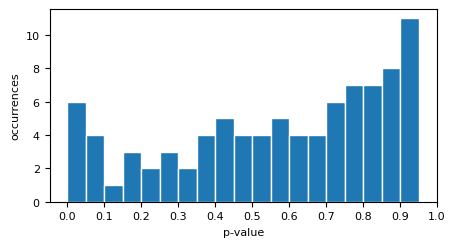

In [32]:
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.hist(p_vec, bins=np.arange(0, 1, 0.05), edgecolor='w')
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_xlabel('p-value')
ax.set_ylabel('occurrences')
fig.savefig('6ffig1.png', dpi=300)
plt.show()